In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import quantstats as qs
import pandas as pd
import os

In [23]:
# extend pandas functionality with metrics, etc.
# qs.extend_pandas()

# # fetch the daily returns for a stock
# stock = qs.utils.download_returns('META')

# # show sharpe ratio
# qs.stats.sharpe(stock)

# # or using extend_pandas() :)
# stock.sharpe()

In [39]:
data_file = '/Users/andrewgoldberg/Projects/hummingbot-backtest/data/l2_data_extract_discord/BINANCE-BNB-USDT-incremental_l2_book-2022-10-13-00-00-00-2022-10-14-00-00-00.csv.gz'
# data_df = pd.read_csv(data_file, chunksize=100000, compression='gzip', error_bad_lines=False)
data_df = pd.read_csv(data_file, compression='gzip', error_bad_lines=False)
data_df = data_df.drop('Unnamed: 0', axis = 1)

/var/folders/c7/8ppmyxcn6znc4ql4nfmfksy80000gn/T/ipykernel_44305/1238169107.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data_df = pd.read_csv(data_file, compression='gzip', error_bad_lines=False)


In [48]:
data_df['ts'] = pd.to_datetime(data_df.local_timestamp, unit = 'us')

In [49]:
data_df

,exchange,symbol,timestamp,local_timestamp,is_snapshot,side,price,amount,ts
0,BINANCE,BNB-USDT,1665619200029000,1665619200140000,False,bid,270.8,299.883,2022-10-13 00:00:00.140
1,BINANCE,BNB-USDT,1665619200029000,1665619200140000,False,bid,270.7,383.521,2022-10-13 00:00:00.140
2,BINANCE,BNB-USDT,1665619200029000,1665619200140000,False,bid,270.6,190.845,2022-10-13 00:00:00.140
3,BINANCE,BNB-USDT,1665619200029000,1665619200140000,False,bid,270.5,144.141,2022-10-13 00:00:00.140
4,BINANCE,BNB-USDT,1665619200029000,1665619200140000,False,bid,270.4,205.904,2022-10-13 00:00:00.140
...,...,...,...,...,...,...,...,...,...
3155346,BINANCE,BNB-USDT,1665705599880000,1665705599990000,False,bid,271.6,79.080,2022-10-13 23:59:59.990
3155347,BINANCE,BNB-USDT,1665705599880000,1665705599990000,False,bid,271.4,172.975,2022-10-13 23:59:59.990
3155348,BINANCE,BNB-USDT,1665705599880000,1665705599990000,False,ask,271.7,465.273,2022-10-13 23:59:59.990
3155349,BINANCE,BNB-USDT,1665705599880000,1665705599990000,False,ask,271.8,159.607,2022-10-13 23:59:59.990


In [59]:
bid_df = data_df[data_df.side == 'bid'].sort_values(['ts', 'price'], ascending=True).drop_duplicates('ts')
ask_df = data_df[data_df.side == 'ask'].sort_values(['ts', 'price'], ascending=True).drop_duplicates('ts')

In [ ]:
bid_df = data_df[data_df.side == 'bid'].sort_values(['ts', 'price'], ascending=True).drop_duplicates('ts')


In [70]:
bid_df = data_df[data_df.side == 'bid'].sort_values(by = ['ts', 'price'], ascending=False).drop_duplicates('ts')

<AxesSubplot:xlabel='ts'>

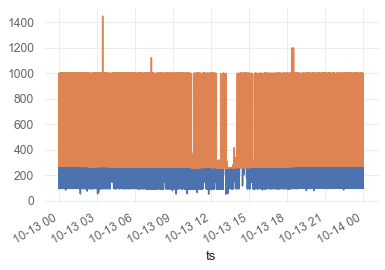

In [72]:
bid_df.set_index('ts').price.plot()
ask_df.set_index('ts').price.plot()

/var/folders/c7/8ppmyxcn6znc4ql4nfmfksy80000gn/T/ipykernel_44305/3786121931.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bid_df.append(ask_df).groupby('ts').price.mean().plot()


<AxesSubplot:xlabel='ts'>

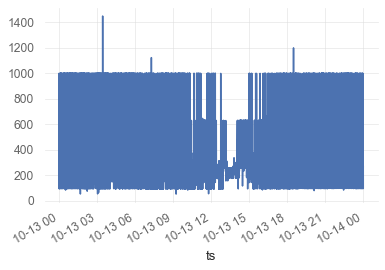

In [78]:
bid_df.append(ask_df).groupby('ts').price.mean().plot()

In [64]:
bid_df = data_df[data_df.side == 'bid']

In [63]:
bid_df.head(20)

,exchange,symbol,timestamp,local_timestamp,is_snapshot,side,price,amount,ts
5,BINANCE,BNB-USDT,1665619200029000,1665619200140000,False,bid,270.3,454.651,2022-10-13 00:00:00.140
15,BINANCE,BNB-USDT,1665619200129000,1665619200245000,False,bid,269.8,493.663,2022-10-13 00:00:00.245
22,BINANCE,BNB-USDT,1665619200229000,1665619200347000,False,bid,270.7,368.006,2022-10-13 00:00:00.347
24,BINANCE,BNB-USDT,1665619200329000,1665619200445000,False,bid,270.2,88.518,2022-10-13 00:00:00.445
29,BINANCE,BNB-USDT,1665619200529000,1665619200640000,False,bid,270.3,454.482,2022-10-13 00:00:00.640
33,BINANCE,BNB-USDT,1665619200629000,1665619200741000,False,bid,270.4,217.175,2022-10-13 00:00:00.741
35,BINANCE,BNB-USDT,1665619200729000,1665619200840000,False,bid,270.7,362.956,2022-10-13 00:00:00.840
37,BINANCE,BNB-USDT,1665619200829000,1665619200940000,False,bid,270.8,233.370,2022-10-13 00:00:00.940
39,BINANCE,BNB-USDT,1665619201129000,1665619201241000,False,bid,270.7,362.916,2022-10-13 00:00:01.241
40,BINANCE,BNB-USDT,1665619201229000,1665619201341000,False,bid,270.7,362.167,2022-10-13 00:00:01.341


<AxesSubplot:xlabel='ts'>

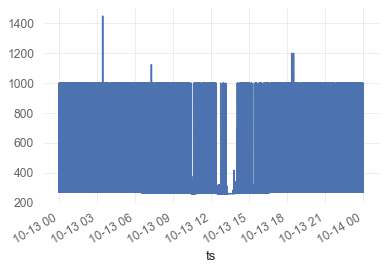

In [62]:
ask_df.set_index('ts').price.plot()

<AxesSubplot:xlabel='ts'>

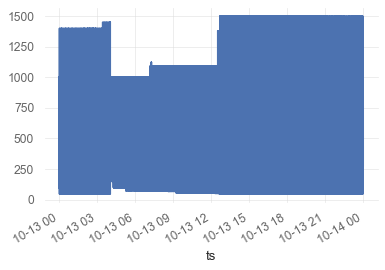

In [50]:
data_df.set_index('ts').price.plot()

In [47]:
data_df

,exchange,symbol,timestamp,local_timestamp,is_snapshot,side,price,amount,ts
0,BINANCE,BNB-USDT,1665619200029000,1665619200140000,False,bid,270.8,299.883,1970-01-20 06:40:19.200140
1,BINANCE,BNB-USDT,1665619200029000,1665619200140000,False,bid,270.7,383.521,1970-01-20 06:40:19.200140
2,BINANCE,BNB-USDT,1665619200029000,1665619200140000,False,bid,270.6,190.845,1970-01-20 06:40:19.200140
3,BINANCE,BNB-USDT,1665619200029000,1665619200140000,False,bid,270.5,144.141,1970-01-20 06:40:19.200140
4,BINANCE,BNB-USDT,1665619200029000,1665619200140000,False,bid,270.4,205.904,1970-01-20 06:40:19.200140
...,...,...,...,...,...,...,...,...,...
3155346,BINANCE,BNB-USDT,1665705599880000,1665705599990000,False,bid,271.6,79.080,1970-01-20 06:41:45.599990
3155347,BINANCE,BNB-USDT,1665705599880000,1665705599990000,False,bid,271.4,172.975,1970-01-20 06:41:45.599990
3155348,BINANCE,BNB-USDT,1665705599880000,1665705599990000,False,ask,271.7,465.273,1970-01-20 06:41:45.599990
3155349,BINANCE,BNB-USDT,1665705599880000,1665705599990000,False,ask,271.8,159.607,1970-01-20 06:41:45.599990


In [40]:
data_df.pivot(index=['timestamp', 'local_timestamp'])

,exchange,symbol,timestamp,local_timestamp,is_snapshot,side,price,amount
0,BINANCE,BNB-USDT,1665619200029000,1665619200140000,False,bid,270.8,299.883
1,BINANCE,BNB-USDT,1665619200029000,1665619200140000,False,bid,270.7,383.521
2,BINANCE,BNB-USDT,1665619200029000,1665619200140000,False,bid,270.6,190.845
3,BINANCE,BNB-USDT,1665619200029000,1665619200140000,False,bid,270.5,144.141
4,BINANCE,BNB-USDT,1665619200029000,1665619200140000,False,bid,270.4,205.904
...,...,...,...,...,...,...,...,...
3155346,BINANCE,BNB-USDT,1665705599880000,1665705599990000,False,bid,271.6,79.080
3155347,BINANCE,BNB-USDT,1665705599880000,1665705599990000,False,bid,271.4,172.975
3155348,BINANCE,BNB-USDT,1665705599880000,1665705599990000,False,ask,271.7,465.273
3155349,BINANCE,BNB-USDT,1665705599880000,1665705599990000,False,ask,271.8,159.607


In [24]:
data_path = '/Users/andrewgoldberg/nautilus_trader/scripts'
# module_path = os.path.dirname(os.path.realpath(__file__))

orders_path = os.path.join(data_path, 'orders.csv')
positions_path = os.path.join(data_path, 'positions.csv')
account_path = os.path.join(data_path, 'account.csv')

In [25]:
orders_df = pd.read_csv(orders_path)
positions_df = pd.read_csv(positions_path)
account_df = pd.read_csv(account_path)

In [26]:
orders_df.head()

,client_order_id,trader_id,strategy_id,instrument_id,venue_order_id,position_id,account_id,last_trade_id,type,side,...,is_post_only,is_reduce_only,display_qty,order_list_id,contingency_type,linked_order_ids,parent_order_id,tags,ts_last,ts_init
0,O-20221013-000000-001-000-1,BACKTESTER-001,MarketMaker-000,BNBUSDT.BINANCE,BINANCE-1-001,BNBUSDT.BINANCE-MarketMaker-000,BINANCE-001,BINANCE-1,LIMIT,BUY,...,False,False,NaN,NaN,NONE,NaN,NaN,NaN,2022-10-13 00:00:00.029000+00:00,2022-10-13 00:00:00.029000+00:00
1,O-20221013-000000-001-000-2,BACKTESTER-001,MarketMaker-000,BNBUSDT.BINANCE,BINANCE-1-002,BNBUSDT.BINANCE-MarketMaker-000,BINANCE-001,BINANCE-2,LIMIT,SELL,...,False,False,NaN,NaN,NONE,NaN,NaN,NaN,2022-10-13 00:00:00.029000+00:00,2022-10-13 00:00:00.029000+00:00
2,O-20221013-000356-001-000-3,BACKTESTER-001,MarketMaker-000,BNBUSDT.BINANCE,BINANCE-1-003,BNBUSDT.BINANCE-MarketMaker-000,BINANCE-001,BINANCE-4,LIMIT,BUY,...,False,False,NaN,NaN,NONE,NaN,NaN,NaN,2022-10-13 00:14:43.511000+00:00,2022-10-13 00:03:56.055000+00:00
3,O-20221013-000356-001-000-4,BACKTESTER-001,MarketMaker-000,BNBUSDT.BINANCE,BINANCE-1-004,BNBUSDT.BINANCE-MarketMaker-000,BINANCE-001,BINANCE-3,LIMIT,SELL,...,False,False,NaN,NaN,NONE,NaN,NaN,NaN,2022-10-13 00:03:56.055000+00:00,2022-10-13 00:03:56.055000+00:00
4,O-20221013-010157-001-000-5,BACKTESTER-001,MarketMaker-000,BNBUSDT.BINANCE,BINANCE-1-005,BNBUSDT.BINANCE-MarketMaker-000,BINANCE-001,BINANCE-6,LIMIT,BUY,...,False,False,NaN,NaN,NONE,NaN,NaN,NaN,2022-10-13 01:37:21.559000+00:00,2022-10-13 01:01:57.189000+00:00


In [27]:
positions_df.head()

,position_id,account_id,opening_order_id,closing_order_id,strategy_id,instrument_id,entry,side,peak_qty,ts_opened,ts_closed,duration_ns,avg_px_open,avg_px_close,realized_return,realized_pnl,commissions
0,BNBUSDT.BINANCE-MarketMaker-000-a2227d2a-cafc-...,BINANCE-001,O-20221013-000000-001-000-1,O-20221013-000000-001-000-2,MarketMaker-000,BNBUSDT.BINANCE,BUY,FLAT,0.3,2022-10-13 00:00:00.029000+00:00,2022-10-13 00:00:00.029000+00:00,0,270.0,270.0,0.00000,-0.16200000 BNB,['0.16200000 BNB']
1,BNBUSDT.BINANCE-MarketMaker-000-b0839c1b-1579-...,BINANCE-001,O-20221013-000356-001-000-4,O-20221013-000356-001-000-3,MarketMaker-000,BNBUSDT.BINANCE,SELL,FLAT,0.3,2022-10-13 00:03:56.055000+00:00,2022-10-13 00:14:43.511000+00:00,647456000000,271.0,270.0,0.00369,-0.02430000 BNB,['0.16230000 BNB']
2,BNBUSDT.BINANCE-MarketMaker-000-be516fc1-6476-...,BINANCE-001,O-20221013-010157-001-000-6,O-20221013-010157-001-000-5,MarketMaker-000,BNBUSDT.BINANCE,SELL,FLAT,0.3,2022-10-13 01:01:57.189000+00:00,2022-10-13 01:37:21.559000+00:00,2124370000000,272.0,270.0,0.00735,0.41310000 BNB,['0.16260000 BNB']


In [28]:
account_df.head()

,Unnamed: 0,total,locked,free,currency,account_id,account_type,base_currency,margins,reported,info
0,2022-10-13 00:00:00.029000+00:00,100000.000,0.00000,100000.00000,BNB,BINANCE-001,CASH,NaN,b'[]',True,b'{}'
1,2022-10-13 00:00:00.029000+00:00,100000.000,0.00000,100000.00000,USDT,BINANCE-001,CASH,NaN,b'[]',True,b'{}'
2,2022-10-13 00:00:00.029000+00:00,99999.919,81.97362,99917.94538,BNB,BINANCE-001,CASH,NaN,b'[]',False,b'{}'
3,2022-10-13 00:00:00.029000+00:00,100000.000,0.00000,100000.00000,USDT,BINANCE-001,CASH,NaN,b'[]',False,b'{}'
4,2022-10-13 00:00:00.029000+00:00,99918.838,0.00000,99918.83800,BNB,BINANCE-001,CASH,NaN,b'[]',False,b'{}'


In [35]:
account_df[account_df.currency == 'BNB'],kicjed

,Unnamed: 0,total,locked,free,currency,account_id,account_type,base_currency,margins,reported,info
0,2022-10-13 00:00:00.029000+00:00,100000.0000,0.00000,100000.00000,BNB,BINANCE-001,CASH,NaN,b'[]',True,b'{}'
2,2022-10-13 00:00:00.029000+00:00,99999.9190,81.97362,99917.94538,BNB,BINANCE-001,CASH,NaN,b'[]',False,b'{}'
4,2022-10-13 00:00:00.029000+00:00,99918.8380,0.00000,99918.83800,BNB,BINANCE-001,CASH,NaN,b'[]',False,b'{}'
7,2022-10-13 00:00:00.029000+00:00,99918.7570,0.30060,99918.45640,BNB,BINANCE-001,CASH,NaN,b'[]',False,b'{}'
10,2022-10-13 00:00:00.029000+00:00,99999.6760,0.00000,99999.67600,BNB,BINANCE-001,CASH,NaN,b'[]',False,b'{}'
...,...,...,...,...,...,...,...,...,...,...,...
202,2022-10-13 18:56:49.247000+00:00,98895.4393,0.00000,98895.43930,BNB,BINANCE-001,CASH,NaN,b'[]',False,b'{}'
205,2022-10-13 19:06:20.208000+00:00,98895.4393,80.30529,98815.13401,BNB,BINANCE-001,CASH,NaN,b'[]',False,b'{}'
208,2022-10-13 19:06:20.208000+00:00,98895.3574,80.60589,98814.75151,BNB,BINANCE-001,CASH,NaN,b'[]',False,b'{}'
211,2022-10-13 19:06:20.208000+00:00,98977.1755,80.30529,98896.87021,BNB,BINANCE-001,CASH,NaN,b'[]',False,b'{}'


In [30]:
account_df.locked.value_counts()

0.000000     178
0.300600      15
82.126926      3
80.305290      3
82.277226      2
81.973620      2
81.062802      1
80.151984      1
80.455590      1
80.608896      1
80.759196      1
80.912502      1
81.366408      1
81.216108      1
81.519714      1
81.670014      1
81.823320      1
82.577826      1
82.427526      1
80.605890      1
Name: locked, dtype: int64

<AxesSubplot:xlabel='Unnamed: 0'>

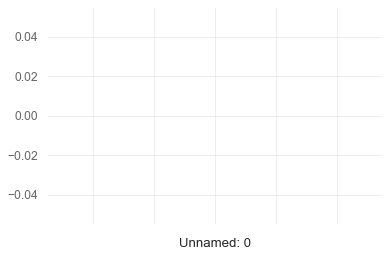

In [34]:
account_df[(account_df.locked > 0) & (account_df.currency == 'USDT')].set_index('Unnamed: 0').locked.plot()

In [19]:
pd.to_datetime(account_df['Unnamed: 0'])

0     2022-10-13 00:00:00.029000+00:00
1     2022-10-13 00:00:00.029000+00:00
2     2022-10-13 00:00:00.029000+00:00
3     2022-10-13 00:00:00.029000+00:00
4     2022-10-13 00:00:00.029000+00:00
                    ...               
212   2022-10-13 19:06:20.208000+00:00
213   2022-10-13 19:06:20.208000+00:00
214   2022-10-13 23:59:59.880000+00:00
215   2022-10-13 23:59:59.880000+00:00
216   2022-10-13 23:59:59.880000+00:00
Name: Unnamed: 0, Length: 217, dtype: datetime64[ns, UTC]

In [15]:
stock = qs.utils.download_returns('META')


Got error from yahoo api for ticker FB, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}


KeyboardInterrupt: 